In [ ]:
!git clone https://github.com/pwu-dev/deep-learning-project.git

Fonction de chargement des images

In [44]:
import os
import PIL
from PIL import Image
import numpy as np

def load_data(data_path, classes, split="training", image_size=64):

	num_images = 0
	for i in range(len(classes)):
		dirs = sorted(os.listdir(data_path + '/' + split + '/' + classes[i]))
		num_images += len(dirs)
                                
	x = np.zeros((num_images, image_size, image_size, 3))
	y = np.zeros((num_images, 1))
    
	current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
	for idx_class in range(len(classes)):
		dirs = sorted(os.listdir(data_path + '/' + split + '/' + classes[idx_class]))
		num_images += len(dirs)
    
        # Chargement des images, 
		for idx_img in range(len(dirs)):
			item = dirs[idx_img]
			if os.path.isfile(data_path + '/' + split + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
				img = Image.open(data_path + '/' + split + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
				img = img.convert('RGB')

        # Redimensionnement de l'image et écriture dans la variable de retour x 
				img = img.resize((image_size,image_size))
				x[current_index] = np.asarray(img)/255
                # Écriture du label associé dans la variable de retour y
				y[current_index] = idx_class
				current_index += 1

	return x, y

Variables utiles

In [54]:
path = "./deep-learning-project/dataset"
CLASSES = ["beurre", "cremes-dessert", "eaux", "fromages", "haricots-verts", 
           "huiles-cuisson", "jus-fruits", "lait", "mais", "oeufs", 
           "pates", "petits-pois", "poissons", "riz", "sodas", 
           "soupes", "viandes-rouges", "volailles", "yaourts-laitiers"]

#CLASSES = ["oeufs", "lait", "eaux"]
IMAGE_SIZE = 128

Chargement des images

In [55]:
x_total, y_total = load_data(path, CLASSES, split="entrainement", image_size=IMAGE_SIZE)

percent = int(len(y_total)/100)

x_training, x_validation, x_test = x_total[:90*percent,:], x_total[90*percent:,:], x_total[90*percent:,:]
y_training, y_validation, y_test = y_total[:90*percent,:], y_total[90*percent:,:], y_total[90*percent:,:]

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Création du model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(96, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(len(CLASSES), activation="softmax"))

model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["sparse_categorical_accuracy"])

Entrainement du réseau

In [ ]:
history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=10, batch_size=10)

In [22]:
import matplotlib.pyplot as plt

def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

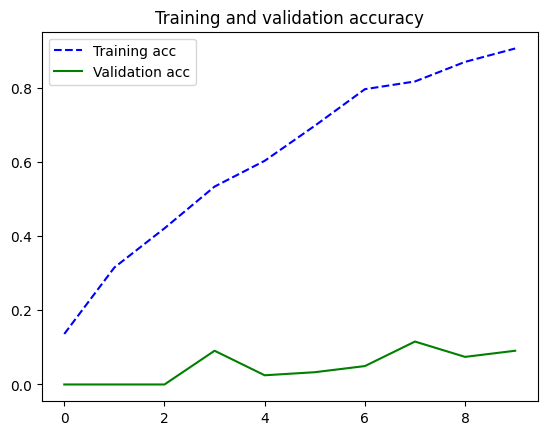

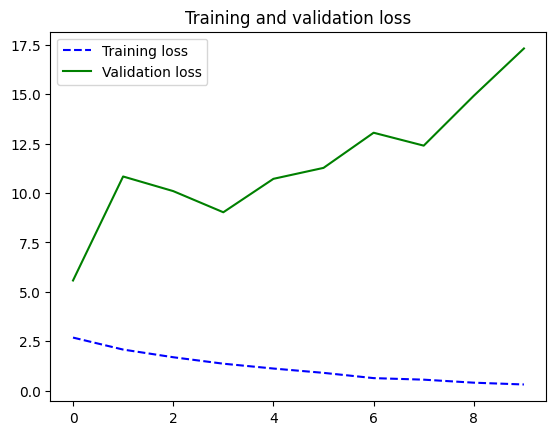

In [58]:
plot_training_analysis()

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(96, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(len(CLASSES), activation="softmax"))

model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["sparse_categorical_accuracy"])

Epoch 1/50
72/72 [==============================] - 5s 44ms/step - loss: 2.7779 - accuracy: 0.0014 - val_loss: 4.6771 - val_accuracy: 0.0000e+00
Epoch 2/50
72/72 [==============================] - 3s 38ms/step - loss: 2.5680 - accuracy: 0.0000e+00 - val_loss: 6.1304 - val_accuracy: 0.0000e+00
Epoch 3/50
72/72 [==============================] - 4s 52ms/step - loss: 2.3788 - accuracy: 0.0042 - val_loss: 5.3189 - val_accuracy: 0.0165
Epoch 4/50
72/72 [==============================] - 3s 39ms/step - loss: 2.1810 - accuracy: 0.0069 - val_loss: 6.9757 - val_accuracy: 0.0000e+00
Epoch 5/50
72/72 [==============================] - 3s 38ms/step - loss: 1.9715 - accuracy: 0.0125 - val_loss: 7.2189 - val_accuracy: 0.1240
Epoch 6/50
72/72 [==============================] - 3s 38ms/step - loss: 1.8750 - accuracy: 0.0208 - val_loss: 9.2030 - val_accuracy: 0.0165
Epoch 7/50
72/72 [==============================] - 4s 52ms/step - loss: 1.7844 - accuracy: 0.0292 - val_loss: 9.0492 - val_accuracy: 0.05

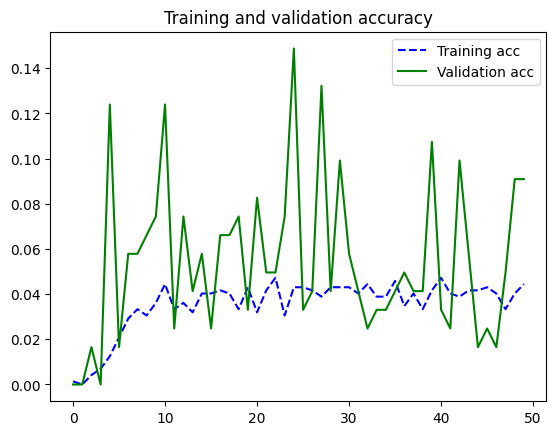

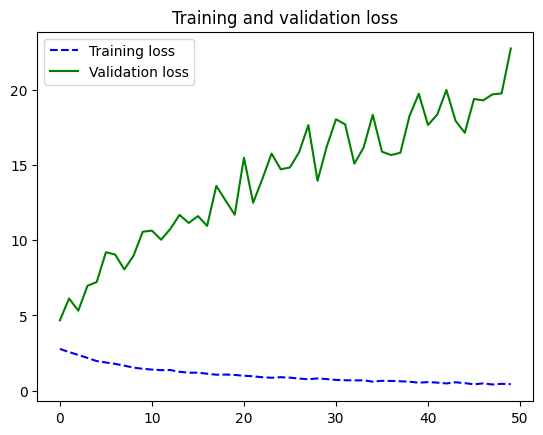

In [60]:
history = model.fit(train_datagen.flow(x_training, y_training, batch_size=10), validation_data=(x_validation, y_validation), epochs=50)
plot_training_analysis()

Transfert Learning


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

conv_base.summary()

In [74]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(CLASSES), activation='softmax'))

conv_base.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss="sparse_categorical_crossentropy",
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_datagen.flow(x_training, y_training, batch_size=10), 
                    validation_data=(x_validation, y_validation),
                    epochs=100,
                    )

Epoch 1/100
72/72 [==============================] - 5s 48ms/step - loss: 2.2152 - sparse_categorical_accuracy: 0.2833 - val_loss: 6.1059 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/100
72/72 [==============================] - 3s 47ms/step - loss: 1.4321 - sparse_categorical_accuracy: 0.5278 - val_loss: 6.9734 - val_sparse_categorical_accuracy: 0.1074
Epoch 3/100
72/72 [==============================] - 3s 47ms/step - loss: 1.1515 - sparse_categorical_accuracy: 0.6236 - val_loss: 7.5050 - val_sparse_categorical_accuracy: 0.1653
Epoch 4/100
72/72 [==============================] - 3s 44ms/step - loss: 1.0077 - sparse_categorical_accuracy: 0.6653 - val_loss: 7.6648 - val_sparse_categorical_accuracy: 0.1405
Epoch 5/100
72/72 [==============================] - 4s 58ms/step - loss: 0.9726 - sparse_categorical_accuracy: 0.6694 - val_loss: 7.7128 - val_sparse_categorical_accuracy: 0.2066
Epoch 6/100
72/72 [==============================] - 3s 46ms/step - loss: 0.7694 - sparse_catego

KeyboardInterrupt: ignored

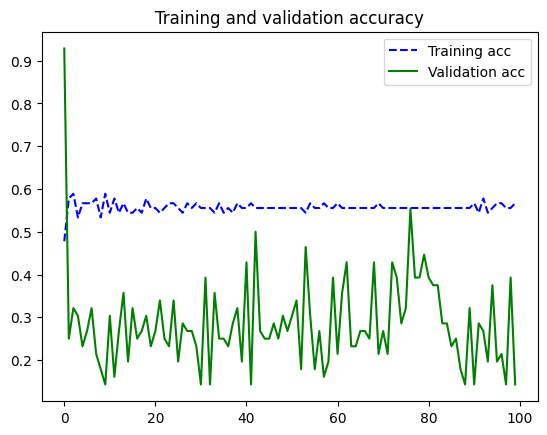

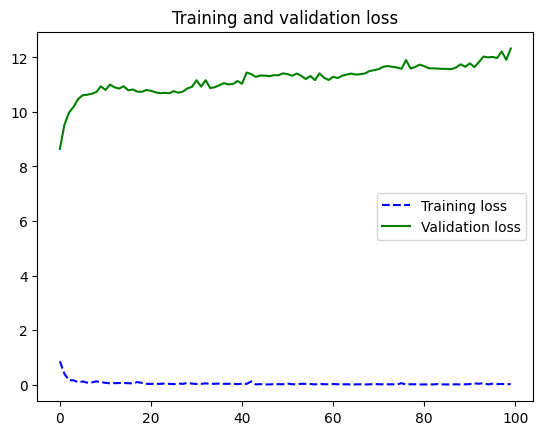

In [53]:
plot_training_analysis()

4/4 [==============================] - 0s 54ms/step
[16  9 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16  3 16 16  9 16 16 16
 16 16  3  3 16 16 16  9 16 16 16 16 16 16 15  3 16 16 16  3 11  0 16  2
  8  8 16 16 16  3  3  3 16 11  9 16  3  8  3 11 15 11  3  9 16 16  3 16
 16  8 16  3  3  3  3 10  7 11 13  5 15  3  3 14  3 16  9  3 16  3 16  3
 14 10  5  0  3  0  3  4  0 10  3  4  4  4  4  3 14  3  5  0  5  8  5  3
  5]


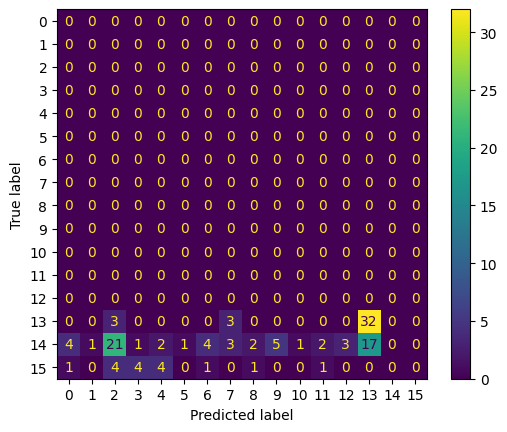

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()